In [2]:
#Print all the variables, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
sample=pd.read_csv('tips.csv')

sample.shape
sample.size

(244, 7)

1708

# Numerical data analysis

### Univariate

In [5]:
## Sum
#df = pd.DataFrame([[1,2,4],[7,3,5],[6,9,8]], columns = ['A','B','C'])
sample.head()
sample.sum()   # sum by row : df.sum(axis = 1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill                                              4827.77
tip                                                      731.58
sex           FemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMa...
smoker        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
day           SunSunSunSunSunSunSunSunSunSunSunSunSunSunSunS...
time          DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
size                                                        627
dtype: object

In [6]:
## Statistical information
sample.mean()
sample.std()  # 标准差
sample.var()  # 方差
sample.skew() # 数据分布的偏斜程度: 正态分布（偏度=0），右偏分布（其偏度>0），左偏分布（偏度<0）
sample.mad()  # 平均绝对离差(mean absolute deviation)
sample.max()
sample.min()
sample.median()
sample.quantile(0.75)   # 分位数
sample.mode(axis=0).iloc[0]  # 众数

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

total_bill    6.869440
tip           1.033019
size          0.779898
dtype: float64

total_bill    50.81
tip              10
sex            Male
smoker          Yes
day            Thur
time          Lunch
size              6
dtype: object

total_bill      3.07
tip                1
sex           Female
smoker            No
day              Fri
time          Dinner
size               1
dtype: object

total_bill    17.795
tip            2.900
size           2.000
dtype: float64

total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64

total_bill     13.42
tip                2
sex             Male
smoker            No
day              Sat
time          Dinner
size               2
Name: 0, dtype: object

In [7]:
sample.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'profit amount')

([], <a list of 0 Text xticklabel objects>)

Text(0, 0.5, 'profit ratio')

([], <a list of 0 Text xticklabel objects>)

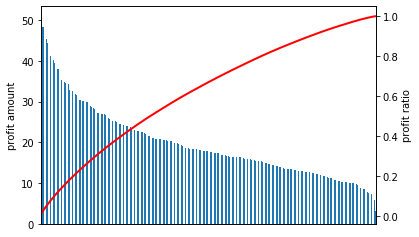

In [49]:
# Contribution analysis 贡献度分析: 前百分之多少的量已经可以达到要求，可以重点投入，而砍掉后面性价比低的

data=sample['total_bill']
data=data.sort_values(ascending = False).reset_index()['total_bill']#.drop('index',axis=1) 

plt.figure()
data.plot(kind='bar')
plt.ylabel('profit amount')
plt.xticks([])

p = 1.0*data.cumsum()/data.sum()    # cumsum生成data的累加数列，结果也是df形式
p.plot(color = 'r', secondary_y = True, linewidth = 2) #, style = '-o'
# plt.annotate(format(p.iloc[100][0], '.4%'), xy = (6, p.iloc[100][0]), xytext=(6*0.9, p.iloc[100][0]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  #添加注释，即第100个数值处的标记。这里包括了指定箭头样式。
plt.ylabel('profit ratio')
plt.xticks([])


### Anomaly detection

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


{'whiskers': [<matplotlib.lines.Line2D at 0x11707bc18>,
 'caps': [<matplotlib.lines.Line2D at 0x117087400>,
 'boxes': [<matplotlib.patches.PathPatch at 0x11707b9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x117087a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x117087dd8>],
 'means': []}

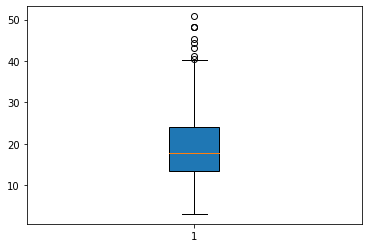

In [23]:
## 3σ method filter anomaly value of total_bill
mean=sample['total_bill'].mean()
sigma=sample['total_bill'].std()
sample[abs(sample.total_bill-mean)>3*sigma]
## 如何简洁的筛选多元？？？？？？？？？？？、

# boxplot描述分布
plt.boxplot(sample['total_bill'],patch_artist=True) #描点上色

### Multivariate co-relation

In [53]:
## covariance and correlation coefficient by Series
x = sample['tip']
y = sample['size']
x.cov(y)
x.corr(y)  ## default method='pearson';  'spearman','kendall' is available
x.corr(y,method='spearman') 

0.6439064291978684

0.4892987752303577

0.46826792926211475

In [9]:
## covariance matrix
sample.cov()
sample.corr()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [10]:
## covariance and correlation coefficient by DataFrame
## DataFrame.corrwith(df, axis=0, drop=False) 运算发生在同名列或同索引的行之间   drop：是否丢掉结果中的NaN
df_1 = pd.DataFrame([[6,7,3],[8,5,0],[7,3,9]],index = [0,1,2],columns = ['A','B','C'])
df_2 = pd.DataFrame([[1,2,3],[4,2,0],[7,3,5]],index = [0,1,2],columns = ['A','B','C'])

df_1.corrwith(df_2)

A    0.500000
B   -0.866025
C    0.953821
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2c8128>,
      dtype=object)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


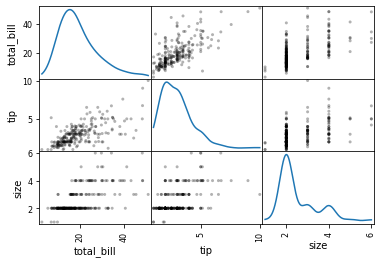

In [50]:
## covariance matrix: Exploring the correlation of every column pair   数据特征相关性两两比较
pd.plotting.scatter_matrix(sample, diagonal='kde', color='k', alpha=0.3)

# Categorical data analysis

In [11]:
# Count for Series
s = pd.Series(['a','b','c','b','a','a'])
s.value_counts(ascending = True)    # Default of ascending is False

c    1
b    2
a    3
dtype: int64

In [12]:
# Count for Dataframe, Nan will not be counted
sample=pd.read_csv('tips.csv')
sample.count() 

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [13]:
sample.describe(include=[np.object])   # describe for categorical data

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Filter

In [14]:
sample.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
sample[sample.total_bill<10]

,total_bill,tip,sex,smoker,day,time,size
6,8.77,2.00,Male,No,Sun,Dinner,2
30,9.55,1.45,Male,No,Sat,Dinner,2
43,9.68,1.32,Male,No,Sun,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
126,8.52,1.48,Male,No,Thur,Lunch,2
135,8.51,1.25,Female,No,Thur,Lunch,2
145,8.35,1.50,Female,No,Thur,Lunch,2


In [16]:
sample[sample.day.isin(['Mon','Fri']) ]

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


### Group and Apply

In [17]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.341954,-1.465844
1,bar,one,0.896788,-0.470655
2,foo,two,0.285760,-0.015207
3,bar,three,-0.151914,-0.200346
4,foo,two,-1.948076,2.345354
5,bar,two,0.118954,-0.880254
6,foo,one,-0.627187,0.657862
7,bar,three,-0.156835,1.690366


In [18]:
df.groupby(['A','B']).sum()  # .mean()  .size()

C         D
A   B                        
bar one    0.896788 -0.470655
    three -0.308749  1.490020
    two    0.118954 -0.880254
foo one    0.714766 -0.807982
    two   -1.662316  2.330147

In [19]:
df_tmp=df.drop('B',axis=1)
df_tmp.groupby('A').apply(lambda x:x.max()-x.min())

,C,D
A,,
bar,1.053623,2.570620
foo,3.290030,3.811198


### Classify

In [20]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a','b','b','a','e','e']})
df

# 重命名类别名为更有意义的名称
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,e
5,6,e


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,e,e
5,6,e,e


In [21]:
# 对分类重新排序，并添加缺失的分类
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4     very bad
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [22]:
# 排序是按照分类的顺序进行的，而不是字典序
df.sort_values(by="grade")

,id,raw_grade,grade
4,5,e,very bad
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


In [23]:
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64